In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
from itertools import combinations
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import networkx as nx
from sklearn.metrics import silhouette_score
import seaborn as sns

In [10]:
filelocation_TET = 'NDT_all_12thDec_uncleaned.csv'
feelings = ['MetaAwareness','Presence','PhysicalEffort','MentalEffort','Boredom', 'Receptivity', 'EmotionalIntensity', 'Clarity', 'Release', 'Bliss', 'Embodiment', 'Insightfulness', 'Anxiety', 'SpiritualExperience']
header = "Week"
no_dimensions = 2
colours = {0:'red',1:'green',2:'blue',3:'orange',4:'pink',5:'yellow'}
colours_list = ['red','green','blue','orange','pink','yellow']
n_clust = 3
headers = {'Subject':0, 'Week':1, 'Session':2}
lcm = 332640
n_rep = 1

In [11]:
class csv_splitter:

    def __init__(self,excel_file_name):
        self.excel_file_location = f'c:\\Users\\hugma\\diss\\{excel_file_name}'
        self.dataframes = None
    def read_excel(self):
        try:
            df_excel_file_name = pd.read_csv(self.excel_file_location)
            return df_excel_file_name
        except Exception as e:
            print(f"error reading Excel file: {e}")
    def split_by_header(self,df_excel_file_name, heading):
        if heading not in df_excel_file_name.columns:
            print(f"Error: '{heading}' not found in DataFrame columns.")
            return None
        heading_values = df_excel_file_name[heading].unique()
        split_df = {value: df_excel_file_name[df_excel_file_name[heading] == value] for value in heading_values}
        split_df_array = [[key, value] for key, value in split_df.items()]
        return split_df, split_df_array

In [12]:
class principal_component_finder:

    def __init__(self,csv_file, feelings,no_dimensions):
        self.csv_file_TET = csv_file[feelings]
        corr_matrix = self.csv_file_TET.corr()
        pca = PCA(n_components=no_dimensions)
        self.principal_components=pca.fit_transform(corr_matrix)
        self.explained_variance_ratio = pca.explained_variance_ratio_
    def PCA_TOT(self):
        df_TET_feelings_prin = self.csv_file_TET.dot(self.principal_components)
        for i in range(0,self.principal_components.shape[1]):
            y_values = []
            for j in range(0,len(feelings)):
                y_values.append(self.principal_components[j][i])
            plt.figure()
            plt.bar(feelings,y_values)
            plt.title(f'principal componant {i+1}')
            plt.xticks(rotation=45, ha='right')
        plt.figure()
        plt.scatter(df_TET_feelings_prin[0],df_TET_feelings_prin[1], s=0.5)
        plt.xlabel('principal componant 1 (bored/effort)')
        plt.ylabel('principal componant 2 (calm)')
        plt.xlim(-6,6)
        plt.ylim(-1,2)
        
        return self.principal_components, self.explained_variance_ratio, df_TET_feelings_prin
    def PCA_split(self,split_df_array):
        split_df_array_TET = [[split_df_array[i][0],split_df_array[i][1][feelings]] for i in range(0,len(split_df_array))]
        split_csv_TET = {split_df_array_TET[i][0]: split_df_array_TET[i][1] for i in range(0,len(split_df_array))}
        df_TET_feelings_prin_dict = {name: split_csv_TET[name].dot(self.principal_components) for name in split_csv_TET.keys()}
        for key,value in df_TET_feelings_prin_dict.items():
            plt.figure()
            plt.scatter(value[0],value[1],s=0.5)
            plt.title(key)
            plt.xlabel('principal componant 1 (bored/effort)')
            plt.ylabel('principal componant 2 (calm)')
            plt.xlim(-6,6)
            plt.ylim(-1,2)
            plt.show()
        return df_TET_feelings_prin_dict

In [13]:
csv_splitter_instance = csv_splitter(filelocation_TET)
df_csv_file = csv_splitter_instance.read_excel()
split_df, split_csv_array = csv_splitter_instance.split_by_header(df_csv_file,header)

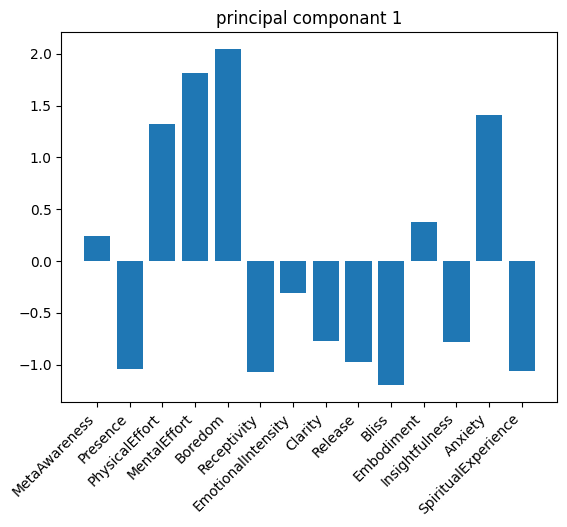

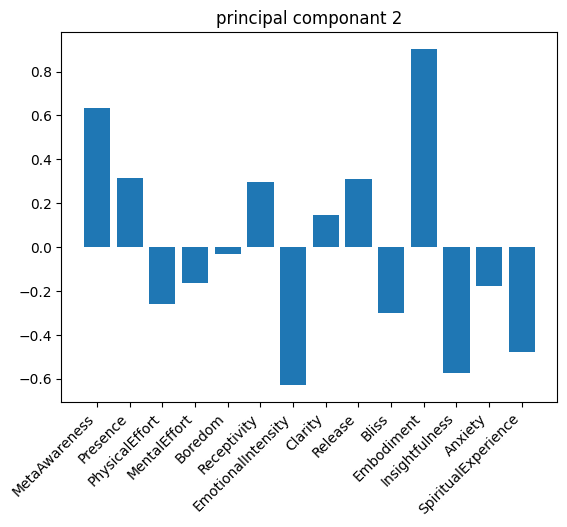

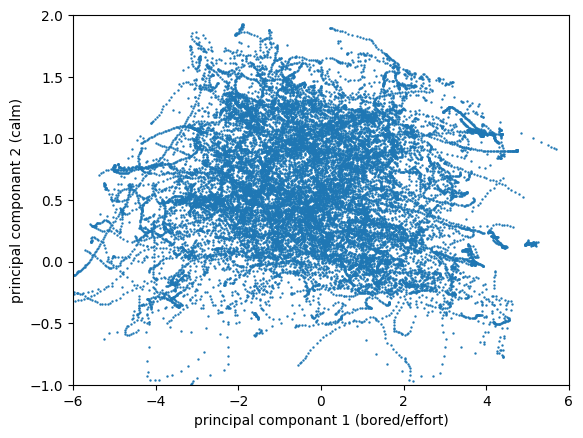

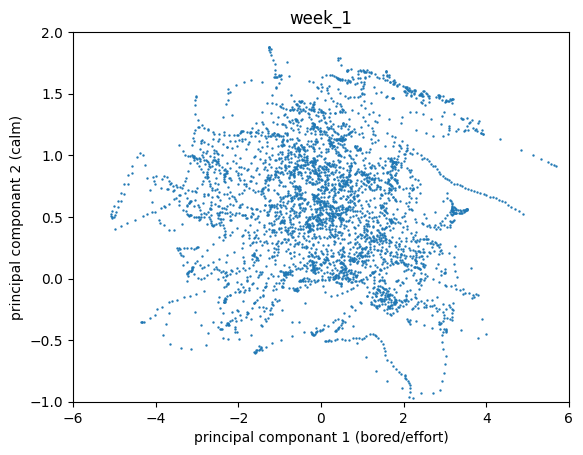

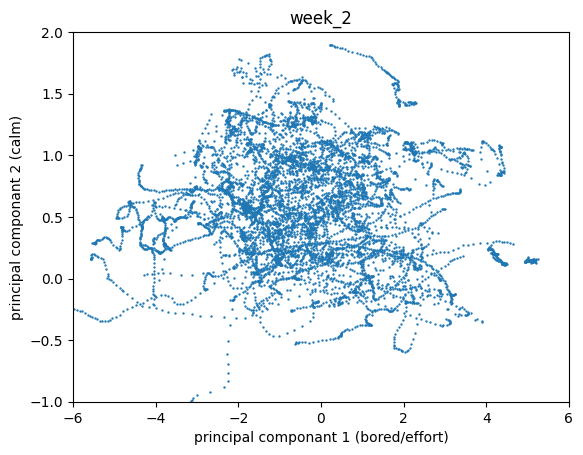

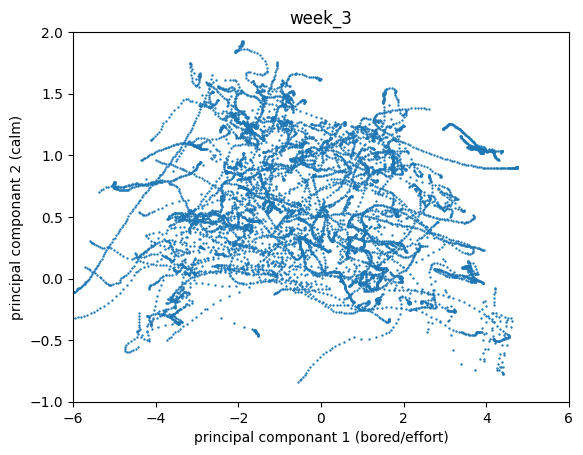

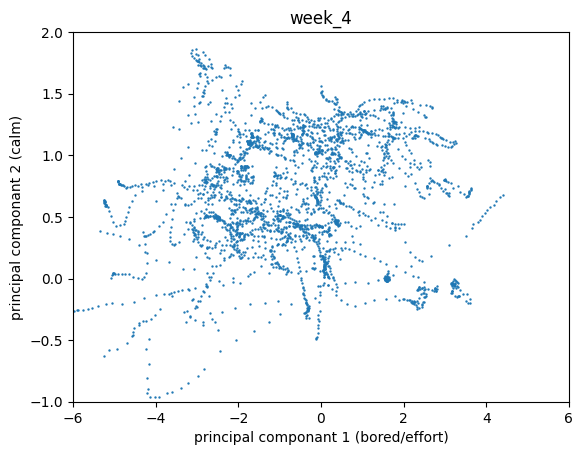

In [14]:
principal_component_finder_instance = principal_component_finder(df_csv_file,feelings,no_dimensions)
principal_components, explained_variance_ratio, df_TET_feelings_prin = principal_component_finder_instance.PCA_TOT()
df_TET_feelings_prin_dict = principal_component_finder_instance.PCA_split(split_csv_array)

for 1 time steps our cluster distribution is {0: 18752, 1: 731, 2: 4336}
true
for 2 time steps our cluster distribution is {0: 583, 1: 9170, 2: 2120}
true
for 3 time steps our cluster distribution is {0: 1702, 1: 5957, 2: 240}
true
for 4 time steps our cluster distribution is {0: 243, 1: 4541, 2: 1072}
true
for 5 time steps our cluster distribution is {0: 3521, 1: 236, 2: 907}
true
for 6 time steps our cluster distribution is {0: 2758, 1: 518, 2: 637}
true
for 7 time steps our cluster distribution is {0: 605, 1: 2332, 2: 371}
true
for 8 time steps our cluster distribution is {0: 490, 1: 358, 2: 2013}
true
for 9 time steps our cluster distribution is {0: 444, 1: 1628, 2: 409}
true
for 10 time steps our cluster distribution is {0: 358, 1: 395, 2: 1503}
true
for 11 time steps our cluster distribution is {0: 367, 1: 276, 2: 1373}
true
for 12 time steps our cluster distribution is {0: 192, 1: 371, 2: 1319}
true
for 13 time steps our cluster distribution is {0: 273, 1: 361, 2: 1096}
true
for

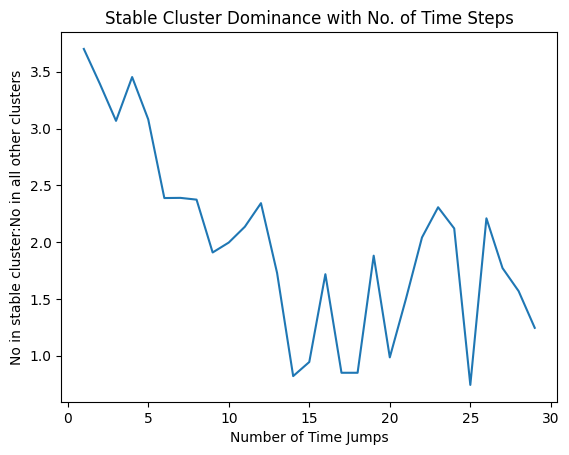

In [15]:
y_labels=[]
x_labels=[]
for j in range(1,30):
    split_dict_skip = {}
    for (subject, week, session), group in df_csv_file.groupby(['Subject', 'Week', 'Session']):
        split_dict_skip[(subject, week, session)] = group.iloc[::j].copy()
    df_csv_file_new = pd.concat([df for df in split_dict_skip.values()])
    for feeling in feelings: 
    
        df_csv_file_new[f'{feeling}_diff'] = -df_csv_file_new[feeling].diff(-1)
        split_dict = {}
    for (subject, week, session), group in df_csv_file_new.groupby(['Subject', 'Week', 'Session']):
        split_dict[(subject, week, session)] = group.copy()
        differences_array = pd.concat([df[:-1] for df in split_dict.values()])
    numbers = []
    for i in range(differences_array.shape[0]):
        numbers.append(i)
    
    differences_array_MI = differences_array.copy()
    differences_array_MI['number'] = numbers
    wcss_best = 10000000
    labels_fin = []
    cluster_centres_fin = []
    for i in range(0,1000):
        kmeans = KMeans(3)
        kmeans.fit(differences_array.iloc[:,-14:])
        labels = kmeans.labels_
        cluster_centres = kmeans.cluster_centers_
        wcss = kmeans.inertia_
        if wcss< wcss_best:
            wcss_best = wcss
            labels_fin = labels
            cluster_centres_fin = cluster_centres
    differences_array_MI['labels unnormalised vectors'] = labels_fin
    (unique, counts) = np.unique(labels, return_counts=True)
    magnitudes = []
    for i in range (len(cluster_centres)):
        magnitudes.append(np.linalg.norm(cluster_centres[i]))
    
    # The function np.unique returns two arrays: one with the unique values and one with their counts
    label_counts = dict(zip(unique, counts))
    print(f'for {j} time steps our cluster distribution is {label_counts}')
    max_clust = [key for key,value in label_counts.items() if value==max(counts)]
    if magnitudes[max_clust[0]]==min(magnitudes):
        print("true")
    else:
        print('false')
    y_labels.append(max(counts)/(sum(counts)-max(counts)))
    x_labels.append(j)
plt.plot(x_labels,y_labels)
plt.title('Stable Cluster Dominance with No. of Time Steps')
plt.xlabel('Number of Time Jumps')
plt.ylabel('No in stable cluster:No in all other clusters')
plt.savefig("C:/Users/hugma/diss/data/stable_cluster_dominance")